In [271]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [272]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import itertools
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

from os.path import join, exists, isfile, isdir
from os import makedirs, listdir

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

In [273]:
#datasets = ["breast", "ads", "adult", "farm", "mnist17", "mnist49", "mnist56"]
datasets = ["mnist56"]
#experiments = ["baseline", "greedy_kernel", "landmarks_based"]
experiments = ["greedy_kernel"]

### Loading results

In [274]:
results_path = join(".", "results")
output_path = join(".", "results", "fig")
if not(exists(output_path)): makedirs(output_path)

In [275]:
def load_dir_results(dir_path):
    dir_results = []
    for f in [f for f in listdir(dir_path) if (isfile(join(dir_path, f)) and f.endswith(".pkl"))]:
        with open(join(dir_path, f), 'rb') as in_file:
            dir_results += pickle.load(in_file)
                
    for d in [d for d in listdir(dir_path) if isdir(join(dir_path, d))]:
        dir_results += load_dir_results(join(dir_path, d))
    
    return dir_results

def load_results(results_path):
    # Loading
    results = []
    for exp in set(listdir(results_path)).intersection(experiments):
        results += load_dir_results(join(results_path, exp))
    results = pd.DataFrame(results)
    return results

In [276]:
# D_values = [40, 10]
# path_list = ["/Users/jacobcomeau/Desktop/stage_portfolio/pbrff/results/greedy_kernel/mnist56/pbrff_jacob_test_0.1.pkl", "/Users/jacobcomeau/Desktop/stage_portfolio/pbrff/results/greedy_kernel/mnist56/pbrff_jacob_test_0.01.pkl", "/Users/jacobcomeau/Desktop/stage_portfolio/pbrff/results/greedy_kernel/mnist56/pbrff_jacob_test_0.001.pkl", "/Users/jacobcomeau/Desktop/stage_portfolio/pbrff/results/greedy_kernel/mnist56/pbrff_jacob_test_1.0.pkl", "/Users/jacobcomeau/Desktop/stage_portfolio/pbrff/results/greedy_kernel/mnist56/pbrff_jacob_test_10.0.pkl", "/Users/jacobcomeau/Desktop/stage_portfolio/pbrff/results/greedy_kernel/mnist56/pbrff_jacob_test_100.0.pkl", "/Users/jacobcomeau/Desktop/stage_portfolio/pbrff/results/greedy_kernel/mnist56/pbrff_jacob_test_1000.0.pkl"]

# for path in path_list:
#     with open(path, 'rb') as in_file:
#         test = pickle.load(in_file)

#     for D in D_values:
#         index = next((index for (index, d) in enumerate(test) if d['D'] == D), None)
#         if index != None:
#             print(D)
#             # del test[index]

#             # with open(path, 'wb') as out_file:
#             #     pickle.dump(test, out_file)

# print("###DONE")

In [277]:
results_file = join(output_path, "results.pkl")
# if not exists(results_file):
#     results = load_results(results_path)
#     with open(results_file, 'wb') as out_file:
#         pickle.dump(results, out_file)
        
with open(results_file, 'rb') as in_file:
    results = pickle.load(in_file)

results = load_results(results_path)
results_per_dataset = {d:results.loc[results.dataset == d] for d in datasets}

results_per_dataset


{'mnist56':      dataset     exp   algo            C     D      N  gamma   beta  \
 0    mnist56  greedy  PBRFF   141.246279     2  20000   0.01   10.0   
 1    mnist56  greedy  PBRFF  8499.195973     1  20000   0.01   10.0   
 2    mnist56  greedy  PBRFF  1998.126570     3  20000   0.01   10.0   
 3    mnist56  greedy  PBRFF   116.778273     4  20000   0.01   10.0   
 4    mnist56  greedy  PBRFF   147.179381     5  20000   0.01   10.0   
 ..       ...     ...    ...          ...   ...    ...    ...    ...   
 359  mnist56  greedy  PBRFF   230.845989  4000  20000   0.01  100.0   
 360  mnist56  greedy  PBRFF   298.560171  4500  20000   0.01  100.0   
 361  mnist56  greedy  PBRFF  6074.118200  5000  20000   0.01  100.0   
 362  mnist56  greedy  PBRFF   837.098377    10  20000   0.01  100.0   
 363  mnist56  greedy  PBRFF   205.163509    40  20000   0.01  100.0   
 
                                                 Loss_l  \
 0         [[0.32154894456470134, 0.32154894456470134]]   
 1   

In [278]:
r = results_per_dataset[datasets[0]]
r

,dataset,exp,algo,C,D,N,gamma,beta,Loss_l,E_l,nbrD_choisi,maxTry,p,epsilon,train_error,val_error,test_error,f1,time
0,mnist56,greedy,PBRFF,141.246279,2,20000,0.01,10.0,"[[0.32154894456470134, 0.32154894456470134]]",[0.00019284510554352986],2,7,9,2.484915e-06,0.124747,0.111167,0.120073,0.881579,"[(sampling, 531.4569473266602), (loss, 11707.5..."
1,mnist56,greedy,PBRFF,8499.195973,1,20000,0.01,10.0,[[0.32154894456470134]],[0.00015892255277176492],1,2,7,1.082082e-07,0.131951,0.121273,0.122195,0.874259,"[(sampling, 531.4569473266602), (loss, 11707.5..."
2,mnist56,greedy,PBRFF,1998.126570,3,20000,0.01,10.0,"[[0.32154894456470134], [0.32154894456470134],...","[8.922552771764932e-06, 8.922552771764932e-06,...",3,2,1,1.839178e-06,0.125379,0.119757,0.127956,0.868618,"[(sampling, 531.4569473266602), (loss, 11707.5..."
3,mnist56,greedy,PBRFF,116.778273,4,20000,0.01,10.0,"[[0.32154894456470134, 0.32154894456470134, 0....",[3.569021108705973e-05],4,4,4,1.343049e-05,0.125000,0.114199,0.125227,0.880463,"[(sampling, 531.4569473266602), (loss, 11707.5..."
4,mnist56,greedy,PBRFF,147.179381,5,20000,0.01,10.0,"[[0.32154894456470134, 0.32154894456470134, 0....",[0.00011961276385882467],5,3,8,7.876059e-06,0.123989,0.115715,0.120073,0.885549,"[(sampling, 531.4569473266602), (loss, 11707.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,mnist56,greedy,PBRFF,230.845989,4000,20000,0.01,100.0,"[[0.32154894456470134, 0.32154894456470134, 0....","[0.00015168339712000382, 0.0001516833971200038...",4000,7,17,6.906702e-06,0.128033,0.121273,0.129776,0.876086,"[(sampling, 531.4569473266602), (loss, 11707.5..."
360,mnist56,greedy,PBRFF,298.560171,4500,20000,0.01,100.0,"[[0.32154894456470134, 0.32154894456470134, 0....","[0.0001784510554352987, 0.0001784510554352987,...",4500,10,20,1.833405e-07,0.128286,0.115210,0.125531,0.874697,"[(sampling, 531.4569473266602), (loss, 11707.5..."
361,mnist56,greedy,PBRFF,6074.118200,5000,20000,0.01,100.0,"[[0.32154894456470134, 0.32154894456470134, 0....","[0.0001784510554352987, 0.0001784510554352987,...",5000,8,20,2.828480e-06,0.140420,0.136938,0.137962,0.868078,"[(sampling, 531.4569473266602), (loss, 11707.5..."
362,mnist56,greedy,PBRFF,837.098377,10,20000,0.01,100.0,"[[0.32154894456470134, 0.32154894456470134, 0....",[0.0002642255277176493],10,7,17,5.020190e-06,0.184403,0.173825,0.182838,0.838034,"[(sampling, 530.0164222717285), (loss, 11385.5..."


# Greedy Kernel Learning

In [279]:
# for d in datasets:
#     print(d)
#     r = results_per_dataset[d]
#     print(r)
#     with open("/Users/jacobcomeau/Desktop/resultat_PBRFF_GREEDY_MNIST56.pkl", 'wb') as out_file:
#         pickle.dump(results, out_file)


mnist56
     dataset     exp   algo            C     D      N  gamma   beta  \
0    mnist56  greedy  PBRFF   141.246279     2  20000   0.01   10.0   
1    mnist56  greedy  PBRFF  8499.195973     1  20000   0.01   10.0   
2    mnist56  greedy  PBRFF  1998.126570     3  20000   0.01   10.0   
3    mnist56  greedy  PBRFF   116.778273     4  20000   0.01   10.0   
4    mnist56  greedy  PBRFF   147.179381     5  20000   0.01   10.0   
..       ...     ...    ...          ...   ...    ...    ...    ...   
359  mnist56  greedy  PBRFF   230.845989  4000  20000   0.01  100.0   
360  mnist56  greedy  PBRFF   298.560171  4500  20000   0.01  100.0   
361  mnist56  greedy  PBRFF  6074.118200  5000  20000   0.01  100.0   
362  mnist56  greedy  PBRFF   837.098377    10  20000   0.01  100.0   
363  mnist56  greedy  PBRFF   205.163509    40  20000   0.01  100.0   

                                                Loss_l  \
0         [[0.32154894456470134, 0.32154894456470134]]   
1                      

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
mnist56


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


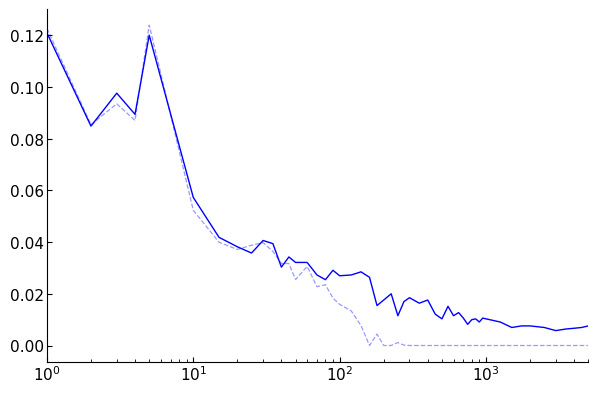

In [280]:
N = 20000
max_D = 5000

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)
for d in datasets:
    print(d)
    r = results_per_dataset[d]

    # # SVM
    # svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    # plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1, label="SVM RBF")

    # # RFF
    # r_rff = r.loc[r.algo == 'RFF'].loc[r.D <= max_D].set_index('D')
    # plt.semilogx(r_rff['train_error'], "--", label=f"RFF-train",color ='g', linewidth=0.9, alpha=0.4)
    # plt.semilogx(r_rff['test_error'], "-", label=f"RFF-test", color ='g', linewidth=1.1)
    
    # # Optimized Kernel RFF
    # r_okrff = r.loc[r.algo == 'OKRFF'].loc[r.D <= max_D]
    # r_okrff = r.loc[r_okrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    # plt.semilogx(r_okrff['train_error'], "--", label=f"OKRFF-train", color ='y', linewidth=0.9,alpha=0.4)
    # plt.semilogx(r_okrff['test_error'], "-", label=f"OKRFF-test", color ='y', linewidth=1)
    
    # PAC-Bayes RFF
    r_pbrff = r.loc[r.algo == 'PBRFF'].loc[r.D <= max_D].sort_values('beta', ascending=False)
    r_pbrff = r.loc[r_pbrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    plt.semilogx(r_pbrff['train_error'], "--", label=f"PBRFF-train", color ='b', linewidth=0.9,alpha=0.4)
    plt.semilogx(r_pbrff['test_error'], "-", label=f"PBRFF-test", color ='b', linewidth=1)
    
    sns.despine(top=True, right=True)
    if d in ["mnist49", "mnist17"]:
        leg = plt.legend(frameon=True, fontsize='x-large')
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=1.3)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    tick_params(axis='both', which='both', pad=2, direction='in', labelsize=11)
    plt.savefig(join(output_path, f"error_vs_features_{d}.pdf"))
    plt.show()

# Landmarks-Based Learning

####  Test error of the landmarks-based approach

In [281]:
# landmarks_method = 'clustering'
# perc_landmarks = 0.1
# beta = 1
# D = 64

# ### SVM ###
# svm_results = pd.DataFrame(results.loc[results.algo == 'SVM'].set_index('dataset')['test_error'])\
#                                                              .rename(columns={'test_error': 'svm'})

# ### RBF ###
# rbf_results = pd.DataFrame(results.loc[(results.algo == 'RBF') & \
#                                        (results.perc_landmarks == perc_landmarks) & \
#                                        (results.method == landmarks_method)] \
#                                        .set_index('dataset')['test_error']) \
#                                        .rename(columns={'test_error': 'rbf'})

# ### PAC-Bayes ###
# pb_results = results.loc[(results.algo == 'PB') & (results.perc_landmarks == perc_landmarks) & \
#                          (results.method == landmarks_method)].sort_values('beta', ascending=True)

# # beta and D optimized on validation set

# pb_results_optimized = pd.DataFrame(pb_results.loc[pb_results.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                                   ["val_error"].idxmin()].set_index('dataset')['test_error']) \
#                                                   .rename(columns={'test_error': 'pb'})

# # beta fixed, D optimized on validation set
# pb_results_beta = pb_results.loc[pb_results.beta == beta]
# pb_results_beta = pd.DataFrame(pb_results_beta.loc[pb_results_beta.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                                   ["val_error"].idxmin()].set_index('dataset')['test_error'])\
#                                                   .rename(columns={'test_error': 'pb_beta'})

# # beta optimized on validation set, D fixed
# pb_results_D = pb_results.loc[pb_results.D == D]
# pb_results_D = pd.DataFrame(pb_results_D.loc[pb_results_D.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                             ["val_error"].idxmin()].set_index('dataset')['test_error']) \
#                                             .rename(columns={'test_error': 'pb_D'})


# table = svm_results.join(rbf_results).join(pb_results_optimized).join(pb_results_beta).join(pb_results_D)
# table = (100*table).round(2).sort_index()
# print(table.to_latex())

#### Behavior of the Landmarks-based approach according to the percentage of training points selected as landmarks

In [282]:
# %pylab inline
# pylab.rcParams['figure.figsize'] = (7, 5)
# for d in datasets:
#     print(f"Dataset: {d}")
#     r = results_per_dataset[d]
    
#     ### SVM ###
#     svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
#     plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1.2, label="SVM RBF")
    
#     ### RBF ###
#     r_rbf = r.loc[r.algo == 'RBF'].sort_values('perc_landmarks')
#     for method in r_rbf.method.unique():
#         plt.plot(r_rbf.loc[r_rbf.method == method].set_index(['perc_landmarks'])['test_error'], 
#                  '--' if method == "random" else "-", 
#                  label=f"RBF Landmarks" + ("-R" if method == "random" else "-C"),
#                  color = 'g',
#                  linewidth=1)
        
#     ### PAC-Bayes ###
#     r_pb = r.loc[r.algo == 'PB'].sort_values('perc_landmarks', ascending=False).sort_values('beta', ascending=True)

#     # Selecting beta and D based on error on the validation set
#     r_pb = r_pb.loc[r_pb.groupby(['method', 'perc_landmarks'])["val_error"].idxmin()]
#     for method in r_pb.method.unique():
#         plt.plot(r_pb.loc[r_pb.method == method].set_index(['perc_landmarks'])['test_error'], 
#                  '--' if method == "random" else "-", 
#                  label=f"PB Landmarks"  + ("-R" if method == "random" else "-C"),
#                  color = 'b',
#                  linewidth = 1)

#     plt.xlabel("Percentage of landmarks", fontsize=14)
#     plt.ylabel("Misclassification error", fontsize=14)
#     sns.despine(top=True, right=True)
#     plt.tight_layout()
#     plt.autoscale(enable=True, axis='x', tight=True)
#     plt.tick_params(axis='both', which='both', pad=3, direction='out', labelsize=12)
#     if d == "farm":
#         plt.legend(frameon=True, fontsize='large')
#     elif d == "ads":
#         plt.legend(frameon=True, fontsize='large',loc=(0.64, 0.32))
#     plt.savefig(join(output_path, f"error_landmarks_{d}.pdf"))
#     plt.show()